# Assignment- 06 - Artificial Neural Network

[Dataset](https://drive.google.com/file/d/1YNuSslEtvOXx3_whqdY54ZqIuBGvRUvd/view?usp=sharing)

1. Importing the necessary libraries and dataset

In [5]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv('/content/mobile_price_classification.csv')

In [7]:
pd.set_option('display.max_columns', None)
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,primary_camera,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
data.shape

(2000, 21)

In [9]:
data.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam',
       '4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

2. Analyzing the target

In [10]:
data['price_range'].unique()

array([1, 2, 3, 0])

In [11]:
data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

There are 4 categories of 'price_range'. There is no data imbalance exhibited.

3. Checking for null entries

In [12]:
data.isna().sum()

battery_power     0
bluetooth         0
clock_speed       0
dual_sim          0
front_cam         0
4G                0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
primary_camera    0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

4. Statistical summary

In [13]:
data.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,primary_camera,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


5. Visualizing the correlation between features and target

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

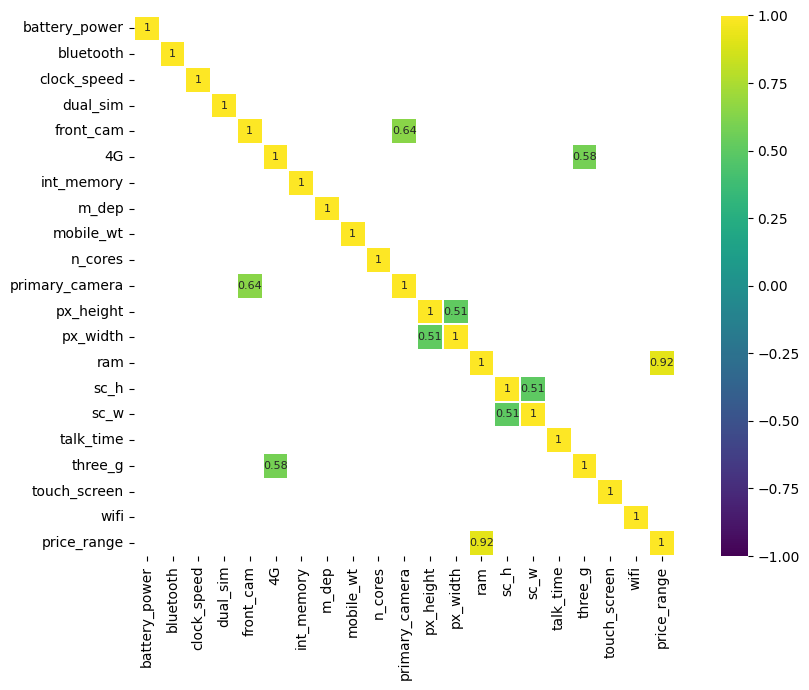

None

In [15]:
corr = data.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.tight_layout()
display(plt.show())

6. Extracting features and target

In [16]:
# Features and Target arrays

x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [17]:
x.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,primary_camera,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


7. Splitting data into train set and test set

In [18]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [19]:
# Split up the data into a training set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [20]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape )

(1500, 20) (500, 20) (1500,) (500,)


8. There are 4 categories of 'price_range' - multiclass classification

In [21]:
from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train, num_classes=4)
y_test_one_hot = to_categorical(y_test, num_classes=4)

9. Model Architecture

In [22]:
# Building Model Architecture

model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(20,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(4, activation='softmax'))  # Output layer with softmax for multi-class classification

10. Compiling the model

In [23]:
# Compiling (configuring) the model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

11. Training

In [24]:
# Fit the model

history = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=200, batch_size=32)


Epoch 1/200
47/47 [==============================] - 2s 8ms/step - loss: 207.6043 - accuracy: 0.2453 - val_loss: 70.2251 - val_accuracy: 0.2340
Epoch 2/200
47/47 [==============================] - 0s 4ms/step - loss: 48.3985 - accuracy: 0.2447 - val_loss: 35.3673 - val_accuracy: 0.2780
Epoch 3/200
47/47 [==============================] - 0s 4ms/step - loss: 22.8537 - accuracy: 0.3693 - val_loss: 18.7824 - val_accuracy: 0.3880
Epoch 4/200
47/47 [==============================] - 0s 4ms/step - loss: 13.9311 - accuracy: 0.4333 - val_loss: 12.5072 - val_accuracy: 0.4620
Epoch 5/200
47/47 [==============================] - 0s 4ms/step - loss: 9.5217 - accuracy: 0.4647 - val_loss: 8.2211 - val_accuracy: 0.4580
Epoch 6/200
47/47 [==============================] - 0s 3ms/step - loss: 6.3189 - accuracy: 0.4933 - val_loss: 5.2059 - val_accuracy: 0.4940
Epoch 7/200
47/47 [==============================] - 0s 3ms/step - loss: 4.6031 - accuracy: 0.5073 - val_loss: 4.2903 - val_accuracy: 0.5000
Epoc

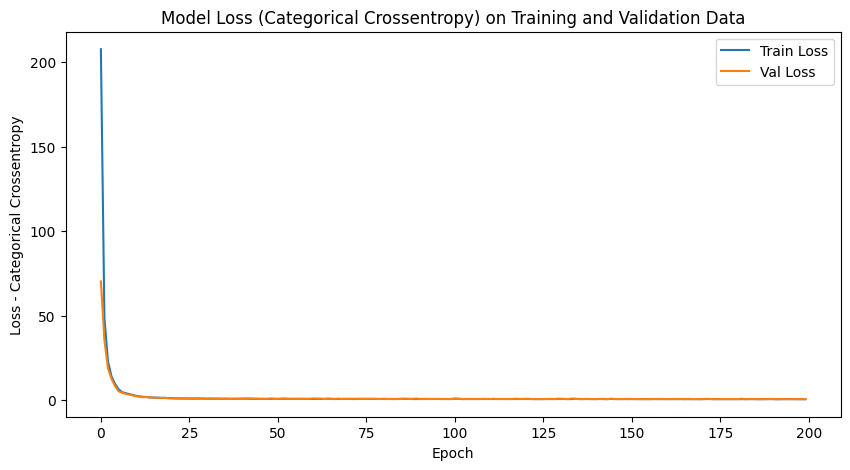

In [25]:
# using visualization for evaluation
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (Categorical Crossentropy) on Training and Validation Data')
plt.ylabel('Loss - Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Val Loss'], loc='upper right')
plt.show()


12. Predicting the sales

In [26]:
# predict sales

test_preds = model.predict(X_test)
print(test_preds)

16/16 [==============================] - 0s 3ms/step
[[8.7076163e-01 1.2923820e-01 4.5946073e-20 1.5443126e-07]
 [2.0550308e-03 4.9954993e-01 4.7849774e-01 1.9897357e-02]
 [1.9040886e-02 9.8095912e-01 4.8986953e-28 2.0836364e-09]
 ...
 [3.9952010e-06 3.7121423e-02 6.6068453e-01 3.0219004e-01]
 [1.6138386e-11 3.5106085e-04 5.3966396e-02 9.4568253e-01]
 [2.1043699e-02 8.3547747e-01 1.4322542e-01 2.5344768e-04]]


test_preds is a NumPy array containing the probability values for each feature set belonging to 4 classes. Each row in test_preds corresponds to a feature set, and each column represents the probability of that feature set belonging to a specific class. The np.argmax(test_preds, axis=1) line is used to determine the predicted class for each feature set based on the maximum probability value along axis 1 (columns).

In [27]:
# Get the predicted class index for each sample
predicted_classes = np.argmax(test_preds, axis=1)
print(predicted_classes)

[0 1 1 2 1 1 2 1 3 2 0 1 2 3 2 1 3 3 1 0 0 1 1 2 0 1 3 2 2 0 1 0 3 0 2 1 2
 1 3 0 1 2 3 0 2 3 2 1 3 1 3 1 0 0 1 1 1 3 0 0 1 3 2 1 1 0 3 3 1 1 2 1 0 1
 2 0 1 3 2 1 3 2 1 0 1 3 2 3 3 0 3 3 3 1 3 1 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 2 2 2 2 3 2 0 2 1 3 3 1 2 3 0 2 0 2 3 1 1 2 0 3 1 0 0 2 2 1 3 3 0 0 0 1
 1 2 3 1 1 0 2 3 0 1 0 1 3 3 2 1 1 0 0 2 2 2 2 1 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 2 1 0 1 1 1 2 1 1 3 3 2 1 2 0 1 0 1 1 1 3 1 1 2 1 1 3 1
 3 0 0 2 1 2 0 0 2 0 1 3 2 1 1 2 3 1 3 3 2 3 0 3 1 2 3 3 2 1 0 3 2 1 3 3 3
 3 3 0 1 2 3 2 3 0 2 3 3 3 2 0 0 2 0 2 3 1 3 1 1 3 1 2 0 0 3 0 2 2 3 2 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 1 3 3 0 2 1 2 2 0 0 1 3 2 3 1 0 1 0 2 3 2 0 2
 3 2 1 2 0 0 2 1 3 2 0 1 1 1 1 1 3 1 0 1 2 3 0 3 0 0 2 0 1 2 2 2 3 0 2 2 3
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 2 3 3 3 1 0 3 2 1 0 2 3 2 1 1 2 1 3 0 2 2 2 0
 1 1 0 1 0 1 0 3 2 3 1 1 1 3 1 0 3 1 0 0 3 0 1 0 0 2 3 3 0 2 0 1 1 3 3 0 2
 1 2 1 0 3 2 0 3 2 2 3 1 1 0 1 3 1 0 3 2 1 0 3 2 3 1 0 3 1 0 1 2 3 1 2 1 0
 0 2 3 1 0 1 2 1 3 1 2 2 

13. Actual data v/s Predicted data

In [29]:
true_preds = pd.DataFrame(list(zip(y_test,predicted_classes)),
                          columns=['True Value','Predicted Value'])
true_preds.head(10)

,True Value,Predicted Value
0,0,0
1,2,1
2,1,1
3,3,2
4,1,1
5,1,1
6,2,2
7,0,1
8,3,3
9,1,2


In [30]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_classes)
print("Accuracy:", accuracy)


Accuracy: 0.778


# Hyperparameter Tuning

In [31]:
!pip install scikeras
from scikeras.wrappers import KerasClassifier

GridSearchCV automates the process of hyperparameter tuning by exhaustively searching through a grid of parameter values, using cross-validation to evaluate model performance, and selecting the best hyperparameters based on the chosen scoring metric. This helps in finding optimal hyperparameters for your machine learning model without manual trial and error.

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
# Define a function to create the Keras model
def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(20, activation=activation, input_shape=(20,)))
    model.add(Dense(10, activation=activation))
    model.add(Dense(7, activation=activation))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [34]:
# Create a KerasClassifier based on the create_model function
model = KerasClassifier(model=create_model, verbose=0)

In [35]:
# Define hyperparameters grid
param_grid = {
    'batch_size': [16, 32],
    'epochs': [100, 200],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__activation': ['relu', 'tanh']
}

In [36]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train_one_hot)

In [37]:
# Print results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.727333 using {'batch_size': 32, 'epochs': 200, 'model__activation': 'relu', 'model__optimizer': 'adam'}
